# ReLU (Rectified Linear Unit)

### 개념 요약
ReLU(Rectified Linear Unit, 정류된 선형 단위)는 현대 딥러닝에서 가장 널리 사용되는 활성화 함수 중 하나임. 작동 방식은 매우 간단하여, 입력값이 0보다 크면 그 값을 그대로 출력하고, 0보다 작거나 같으면 0을 출력함.

이러한 단순함에도 불구하고, 시그모이드(Sigmoid)나 하이퍼볼릭 탄젠트(tanh) 함수가 갖는 기울기 소실(Vanishing Gradient) 문제를 효과적으로 해결하여 심층 신경망의 학습을 더 빠르고 효율적으로 만듦.

### 📐 수학적 배경
ReLU 함수와 그 미분은 다음과 같이 매우 간결하게 정의됨.

1. **ReLU 함수(ReLU Function):**
$$ f(x) = \max(0, x) $$
이 식은 다음과 같이 풀어서 쓸 수 있음:
$$ f(x) = \begin{cases} x & \text{if } x > 0 \\ 0 & \text{if } x \le 0 \end{cases} $$

2. **ReLU 함수의 미분(Derivative):**
$$ f'(x) = \begin{cases} 1 & \text{if } x > 0 \\ 0 & \text{if } x < 0 \end{cases} $$

* $x=0$에서는 수학적으로 미분 불가능하지만, 실제 구현에서는 0 또는 1의 값으로 처리하여 문제를 해결함.

### 라이브러리 임포트 (Setup)

In [1]:
# !pip install numpy matplotlib

import numpy as np
import matplotlib.pyplot as plt

### 예제 데이터 준비 (Data Preparation)
ReLU 함수의 형태와 그 미분 그래프를 그리기 위해 음수와 양수를 모두 포함하는 데이터 범위를 생성함.

In [2]:
# -10부터 10까지 100개의 점을 생성하여 x 데이터로 사용
x_data = np.linspace(-10, 10, 100)
print(f"입력 데이터 (x_data) shape: {x_data.shape}")

입력 데이터 (x_data) shape: (100,)


### 핵심 로직 구현 (Code Implementation)
NumPy를 사용하여 ReLU 함수와 그 미분을 코드로 구현함. `np.maximum`을 사용하면 매우 간결하게 구현 가능함.

In [3]:
# ReLU 함수 정의
def relu(x):
    return np.maximum(0, x)

# ReLU 함수의 미분 정의
def relu_derivative(x):
    # x > 0 인 경우 1, 아닌 경우 0을 반환
    return np.where(x > 0, 1, 0)

# 준비된 데이터에 ReLU 함수 적용
relu_output = relu(x_data)
derivative_output = relu_derivative(x_data)

# 주요 입력값에 대한 출력 확인
input_val = -7
output_val = relu(input_val)
print(f"입력값(x) = {input_val}, ReLU 출력값 = {output_val}")

input_val = 0
output_val = relu(input_val)
print(f"입력값(x) = {input_val}, ReLU 출력값 = {output_val}")

input_val = 7
output_val = relu(input_val)
print(f"입력값(x) = {input_val}, ReLU 출력값 = {output_val}")

입력값(x) = -7, ReLU 출력값 = 0
입력값(x) = 0, ReLU 출력값 = 0
입력값(x) = 7, ReLU 출력값 = 7


### 📊 결과 확인 및 시각화 (Results & Visualization)
ReLU 함수와 그 미분 함수의 그래프를 시각화하여 형태와 특징을 직관적으로 확인함. 양수 입력에 대해 기울기가 1로 일정하게 유지되는 것이 핵심임.

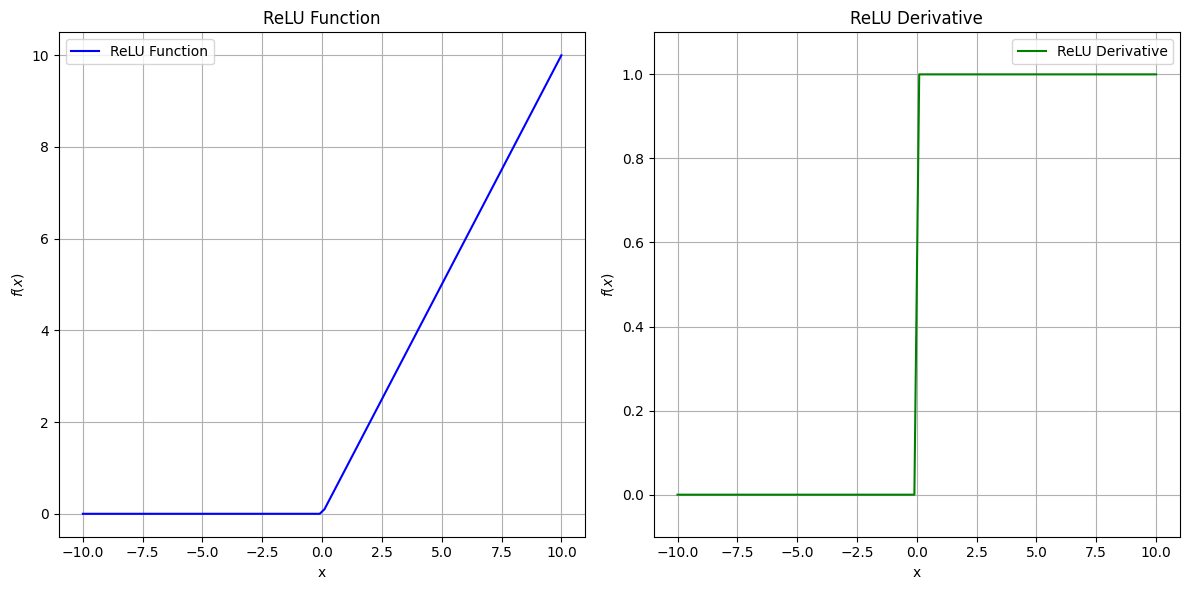

In [4]:
plt.figure(figsize=(12, 6))

# ReLU 함수 그래프
plt.subplot(1, 2, 1)
plt.plot(x_data, relu_output, label='ReLU Function', color='blue')
plt.title('ReLU Function')
plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.grid(True)
plt.legend()

# ReLU 미분 함수 그래프
plt.subplot(1, 2, 2)
plt.plot(x_data, derivative_output, label='ReLU Derivative', color='green')
plt.title('ReLU Derivative')
plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.ylim(-0.1, 1.1) # y축 범위 설정
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### 고려사항 (Considerations)

* <b>죽은 ReLU(Dying ReLU) 문제</b>: 만약 입력값이 항상 음수이면 해당 뉴런의 출력은 항상 0이 되고, 기울기 또한 0이 됨. 이 경우, 역전파 과정에서 해당 뉴런의 가중치는 더 이상 업데이트되지 않아 '죽은' 것처럼 행동하게 됨. 이는 주로 높은 학습률(learning rate)을 사용할 때 발생할 수 있음.
* **ReLU 변형 함수**: '죽은 ReLU' 문제를 해결하기 위해 Leaky ReLU, PReLU, ELU 등 다양한 변형 함수들이 제안되었음. 이들은 입력값이 음수일 때 0 대신 아주 작은 양수 값을 출력하도록 설계됨.

### 최종 요약 (Conclusion)
ReLU는 $f(x) = \max(0, x)$로 정의되는 매우 단순하고 계산적으로 효율적인 활성화 함수임. 양수 입력에 대해 기울기가 1로 유지되므로, 깊은 신경망에서도 기울기 소실 문제없이 경사를 효과적으로 전파할 수 있음.

이러한 장점 덕분에 ReLU는 연산 비용을 줄이고 학습 속도를 크게 향상시켜, 오늘날 대부분의 심층 신경망 모델에서 은닉층의 기본 활성화 함수로 채택되고 있음. '죽은 ReLU'와 같은 잠재적 문제가 있지만, 그 성능과 효율성으로 인해 여전히 강력한 선택지로 남아있음.